In [1]:
import dill
import jupyter_contrib_nbextensions

In [3]:
# import all utilities imports
import matplotlib as mp, pandas as pd, numpy as np, geopandas as gpd
import functools
import math
from math import sqrt
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pysal as ps
import random
import pylab
import matplotlib.colors as cols
from mpl_toolkits.axes_grid1 import make_axes_locatable
from shapely.geometry import Point, LineString, MultiLineString
from numpy.random import randn
from scipy import sparse
from scipy.sparse import linalg
import matplotlib.patches as mpatches
import sys
from time import sleep
pd.set_option('precision', 10)
from mpl_toolkits.mplot3d.art3d import Line3DCollection

#import all street network fuctions imports
import osmnx as ox, networkx as nx, matplotlib.cm as cm, pandas as pd, numpy as np, geopandas as gpd
import functools
import community
import math
from math import sqrt
import matplotlib.pyplot as plt
import ast

from scipy import sparse
from scipy.sparse import linalg
import pysal as ps

from shapely.geometry import Point, LineString, Polygon, MultiPolygon, mapping, MultiLineString
from shapely.ops import cascaded_union, linemerge, nearest_points
pd.set_option('precision', 10)

#import computational notebook functions
import networkx as nx, matplotlib.cm as cm, pandas as pd, numpy as np
import community
import matplotlib.pyplot as plt
from importlib import reload
import geopandas as gpd
import functools
%matplotlib inline

pd.set_option('precision', 5)
pd.options.display.float_format = '{:20.2f}'.format
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.mode.chained_assignment = None

In [4]:
import street_network_functions as snf
import utilities as uf
import routing_functions as rf

## 1. Download and simplify graph

In [5]:
#initialise path, names, etc.

city_name = 'Valencia'
saving_path ='dataComp/'+'Valencia' +'/'
epsg = 4326
crs = {'init': 'epsg:4326', 'no_defs': True}

In [6]:
# choose the method and specify how the graph is obtained

option_1 = True
option_2 = False

download = True
shapeFiles = False

In [7]:
#in case of Valencia, specify location and downloading method
placeValencia = 'Puerta del Mar, Valencia, ES'
method_A = 'distance_from_address'

if (download == True):
    
    if (option_1 == True):
        #graph_A  
        nodes_small, edges_small = snf.get_fromOSM(method_A, placeValencia, 'bike', epsg, distance = 4000)
        print("done - Option 1")

done - Option 1


In [8]:
#simplifying network (for small ones)
nodes_small, edges_small = snf.reset_index_gdf(nodes_small, edges_small)
nodes_small, edges_small = snf.clean_network(nodes_small, edges_small, dead_ends = True)

possible double edges 141
possible double edges 87
possible double edges 29
possible double edges 9
possible double edges 3
possible double edges 2
possible double edges 2
possible double edges 1
possible double edges 1
possible double edges 1
possible double edges 1
possible double edges 1
possible double edges 1
possible double edges 1
possible double edges 1
Correcting edges coordinates..
Done
Done after  15  cycles


In [9]:
nodes_small.crs = crs

## 2. Create Primal Graph   

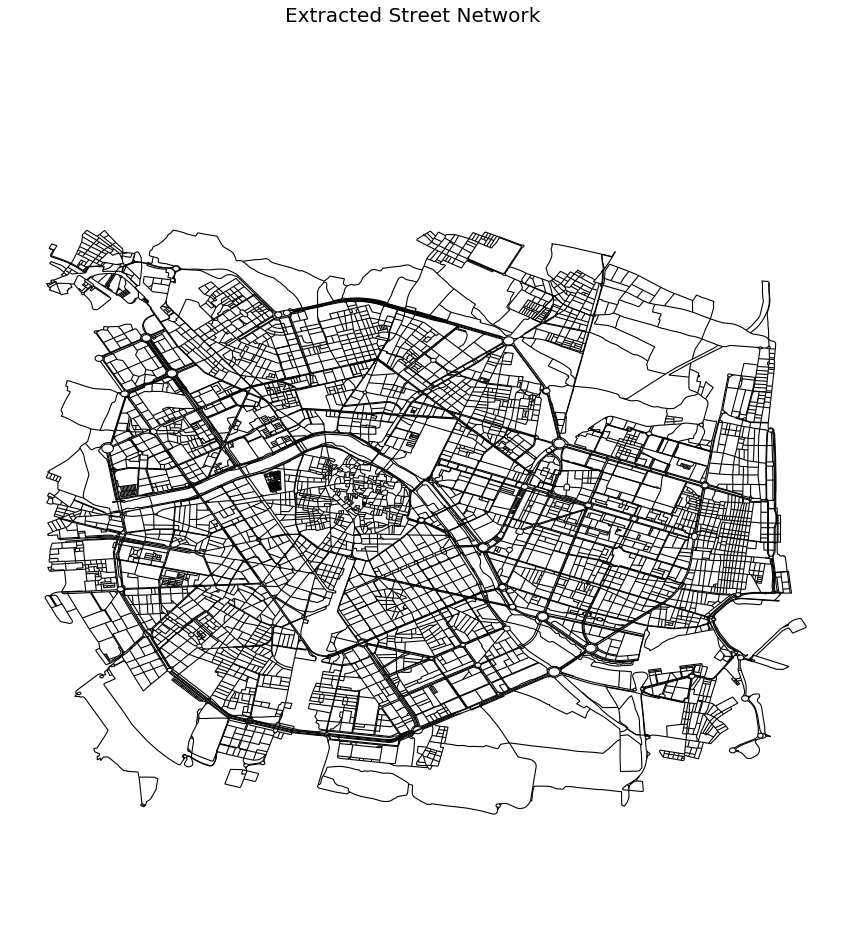

In [10]:
uf.plot_lines(edges_small, bb = False, f = 15, title = 'Extracted Street Network')

In [11]:
edges_small

,streetID,key,geometry,length,highway,oneway,name,u,v,pedestrian
6,6,0,"LINESTRING (-0.35455 39.47602, -0.35442 39.47629)",0.000,cycleway,0,NaN,2,5442,0
7,7,0,"LINESTRING (-0.35455 39.47602, -0.35462 39.47588)",0.000,cycleway,0,NaN,2,6,0
8,8,0,"LINESTRING (-0.35455 39.47602, -0.35497 39.476...",0.001,primary,1,Avinguda de Blasco Ibáñez,2,6551,0
9,9,0,"LINESTRING (-0.39384 39.45899, -0.39386 39.459...",0.000,pedestrian,0,Carrer d'En Galceràn,3,3542,1
10,10,0,"LINESTRING (-0.39384 39.45899, -0.39353 39.458...",0.000,pedestrian,0,NaN,3,4568,1
...,...,...,...,...,...,...,...,...,...,...
31584,31584,0,"LINESTRING (-0.40383 39.45488, -0.40366 39.454...",0.001,residential,1,Carrer del Professor Àngel Lacalle,14271,13136,0
31585,31585,0,"LINESTRING (-0.40383 39.45488, -0.40376 39.454...",0.001,residential,1,Carrer de l'Arquitecte Segura de Lago,14271,712,0
31589,31589,0,"LINESTRING (-0.39293 39.46073, -0.39206 39.46163)",0.001,residential,1,Carrer de Maria Jordán,14273,654,0
31590,31590,0,"LINESTRING (-0.39293 39.46073, -0.39251 39.46049)",0.000,residential,1,Carrer de Manuel Simó,14273,4405,0


In [12]:
edges_di = edges_small.copy()

In [13]:
edges_di.index = np.arange(0,len(edges_di))

In [14]:
edges_di.head()

,streetID,key,geometry,length,highway,oneway,name,u,v,pedestrian
0,6,0,"LINESTRING (-0.35455 39.47602, -0.35442 39.47629)",0.000,cycleway,0,NaN,2,5442,0
1,7,0,"LINESTRING (-0.35455 39.47602, -0.35462 39.47588)",0.000,cycleway,0,NaN,2,6,0
2,8,0,"LINESTRING (-0.35455 39.47602, -0.35497 39.476...",0.001,primary,1,Avinguda de Blasco Ibáñez,2,6551,0
3,9,0,"LINESTRING (-0.39384 39.45899, -0.39386 39.459...",0.000,pedestrian,0,Carrer d'En Galceràn,3,3542,1
4,10,0,"LINESTRING (-0.39384 39.45899, -0.39353 39.458...",0.000,pedestrian,0,NaN,3,4568,1


In [15]:
edges_smalldi = rf.copy_DiEdges(edges_di)

In [16]:
edges_smalldi

,streetID,key,geometry,length,highway,oneway,name,u,v,pedestrian
0,6,0,"LINESTRING (-0.35455 39.47602, -0.35442 39.47629)",0.000,cycleway,0,NaN,2,5442,0
1,7,0,"LINESTRING (-0.35455 39.47602, -0.35462 39.47588)",0.000,cycleway,0,NaN,2,6,0
2,8,0,"LINESTRING (-0.35455 39.47602, -0.35497 39.476...",0.001,primary,1,Avinguda de Blasco Ibáñez,2,6551,0
3,9,0,"LINESTRING (-0.39384 39.45899, -0.39386 39.459...",0.000,pedestrian,0,Carrer d'En Galceràn,3,3542,1
4,10,0,"LINESTRING (-0.39384 39.45899, -0.39353 39.458...",0.000,pedestrian,0,NaN,3,4568,1
...,...,...,...,...,...,...,...,...,...,...
26056,31496,0,"LINESTRING (-0.35247 39.47658, -0.35256 39.476...",0.001,cycleway,0,NaN,14248,14231,0
26057,31533,0,"LINESTRING (-0.35325 39.47676, -0.35331 39.47670)",0.000,cycleway,0,NaN,14254,14248,0
26058,31536,0,"LINESTRING (-0.39369 39.45379, -0.39242 39.45335)",0.001,residential,0,Carrer de Gaspar Torrella,14258,14249,0
26059,31542,0,"LINESTRING (-0.39393 39.45344, -0.39399 39.453...",0.002,service,0,NaN,14269,14252,0


### creating graphs
#### using osmnx

In [17]:
#give gdf a name
nodes_small.gdf_name = city_name
#create graph
Gox_raw = ox.gdfs_to_graph(nodes_small, edges_smalldi)

In [18]:
#add edge length
Gox_raw = ox.add_edge_lengths(Gox_raw)

## 3 adding parameters
### 3.1 adding elevation

In [19]:
#call api from google elevation
api_key = "123"

In [20]:
# add node elevation from API (yet can't continue using this graph to create edges)
G_elv = ox.add_node_elevations(Gox_raw, api_key)

In [21]:
# add grade based on direction 
G_elvG = ox.add_edge_grades(G_elv)

In [22]:
nodesEG,edgesEG = ox.graph_to_gdfs(G_elvG)

#examine gdf of grade
edgesEG.head()

,u,v,key,streetID,geometry,length,highway,oneway,pedestrian,grade,grade_abs,name
0,2,5442,0,6,"LINESTRING (-0.35455 39.47602, -0.35442 39.47629)",32.128,cycleway,0,0,0.016,0.016,NaN
1,2,6,0,7,"LINESTRING (-0.35455 39.47602, -0.35462 39.47588)",16.423,cycleway,0,0,-0.013,0.013,NaN
2,2,6551,0,8,"LINESTRING (-0.35455 39.47602, -0.35497 39.476...",65.709,primary,1,0,0.025,0.025,Avinguda de Blasco Ibáñez
3,3,3542,0,9,"LINESTRING (-0.39384 39.45899, -0.39386 39.459...",47.111,pedestrian,0,1,0.013,0.013,Carrer d'En Galceràn
4,3,4568,0,10,"LINESTRING (-0.39384 39.45899, -0.39353 39.458...",42.766,pedestrian,0,1,0.008,0.008,NaN


In [23]:
#edgesEG.loc((edgesEG['u']==2))
edgesEG.loc[(edgesEG['u']==2)]

,u,v,key,streetID,geometry,length,highway,oneway,pedestrian,grade,grade_abs,name
0,2,5442,0,6,"LINESTRING (-0.35455 39.47602, -0.35442 39.47629)",32.128,cycleway,0,0,0.016,0.016,NaN
1,2,6,0,7,"LINESTRING (-0.35455 39.47602, -0.35462 39.47588)",16.423,cycleway,0,0,-0.013,0.013,NaN
2,2,6551,0,8,"LINESTRING (-0.35455 39.47602, -0.35497 39.476...",65.709,primary,1,0,0.025,0.025,Avinguda de Blasco Ibáñez


In [24]:
edgesEG.loc[(edgesEG['v']==2)]

,u,v,key,streetID,geometry,length,highway,oneway,pedestrian,grade,grade_abs,name
11,6,2,0,7,"LINESTRING (-0.35455 39.47602, -0.35462 39.47588)",16.423,cycleway,0,0,0.013,0.013,NaN
102,49,2,0,121,"LINESTRING (-0.35443 39.47598, -0.35449 39.476...",11.541,primary,1,0,0.019,0.019,Avinguda de Blasco Ibáñez
9903,5442,2,0,6,"LINESTRING (-0.35455 39.47602, -0.35442 39.47629)",32.128,cycleway,0,0,-0.016,0.016,NaN


In [25]:
#analyze edge grade
avg_grade = np.mean(edgesEG.grade_abs)
print('Average street grade in {} is {:.1f}%'.format(city_name, avg_grade*100))

med_grade = np.median(edgesEG.grade_abs)
print('Median street grade in {} is {:.1f}%'.format(city_name, med_grade*100))

Average street grade in Valencia is 1.2%
Median street grade in Valencia is 0.8%


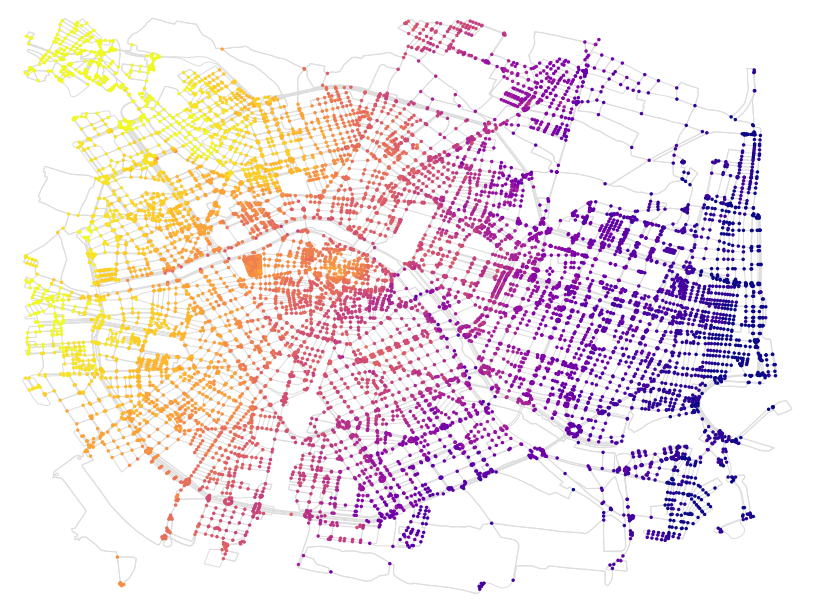

In [26]:
# get one color for each node, by elevation, then plot the network
nc = ox.get_node_colors_by_attr(G_elvG, 'elevation', cmap='plasma', num_bins=20)
%matplotlib inline
fig, ax = ox.plot_graph(G_elvG, fig_height=11, node_color=nc, node_size=12, node_zorder=2, edge_color='#dddddd')

### 3.2 adding bikePath

In [27]:
edgesW = edgesEG.copy()
edgesW.head()

,u,v,key,streetID,geometry,length,highway,oneway,pedestrian,grade,grade_abs,name
0,2,5442,0,6,"LINESTRING (-0.35455 39.47602, -0.35442 39.47629)",32.128,cycleway,0,0,0.016,0.016,NaN
1,2,6,0,7,"LINESTRING (-0.35455 39.47602, -0.35462 39.47588)",16.423,cycleway,0,0,-0.013,0.013,NaN
2,2,6551,0,8,"LINESTRING (-0.35455 39.47602, -0.35497 39.476...",65.709,primary,1,0,0.025,0.025,Avinguda de Blasco Ibáñez
3,3,3542,0,9,"LINESTRING (-0.39384 39.45899, -0.39386 39.459...",47.111,pedestrian,0,1,0.013,0.013,Carrer d'En Galceràn
4,3,4568,0,10,"LINESTRING (-0.39384 39.45899, -0.39353 39.458...",42.766,pedestrian,0,1,0.008,0.008,NaN


In [28]:
# condition, if highyway = cycleway, create has bike path = 1 , else 0
edgesW['hasBikeP'] = edgesW['highway'].apply(lambda x: 1 if x == 'cycleway' else 0)
edgesW.head()

,u,v,key,streetID,geometry,length,highway,oneway,pedestrian,grade,grade_abs,name,hasBikeP
0,2,5442,0,6,"LINESTRING (-0.35455 39.47602, -0.35442 39.47629)",32.128,cycleway,0,0,0.016,0.016,NaN,1
1,2,6,0,7,"LINESTRING (-0.35455 39.47602, -0.35462 39.47588)",16.423,cycleway,0,0,-0.013,0.013,NaN,1
2,2,6551,0,8,"LINESTRING (-0.35455 39.47602, -0.35497 39.476...",65.709,primary,1,0,0.025,0.025,Avinguda de Blasco Ibáñez,0
3,3,3542,0,9,"LINESTRING (-0.39384 39.45899, -0.39386 39.459...",47.111,pedestrian,0,1,0.013,0.013,Carrer d'En Galceràn,0
4,3,4568,0,10,"LINESTRING (-0.39384 39.45899, -0.39353 39.458...",42.766,pedestrian,0,1,0.008,0.008,NaN,0


### 3.3 adding slopecost

In [29]:
#create slope cost variable
edgesW['slopeCost'] = 0
edgesW['slopeCost'] = edgesW['slopeCost'].astype(float)

In [30]:
# add slope Cost
edgesW = rf.slopeTime(edgesW)
edgesW.head()

,u,v,key,streetID,geometry,length,highway,oneway,pedestrian,grade,grade_abs,name,hasBikeP,slopeCost
0,2,5442,0,6,"LINESTRING (-0.35455 39.47602, -0.35442 39.47629)",32.128,cycleway,0,0,0.016,0.016,NaN,1,10.884
1,2,6,0,7,"LINESTRING (-0.35455 39.47602, -0.35462 39.47588)",16.423,cycleway,0,0,-0.013,0.013,NaN,1,3.666
2,2,6551,0,8,"LINESTRING (-0.35455 39.47602, -0.35497 39.476...",65.709,primary,1,0,0.025,0.025,Avinguda de Blasco Ibáñez,0,26.884
3,3,3542,0,9,"LINESTRING (-0.39384 39.45899, -0.39386 39.459...",47.111,pedestrian,0,1,0.013,0.013,Carrer d'En Galceràn,0,15.017
4,3,4568,0,10,"LINESTRING (-0.39384 39.45899, -0.39353 39.458...",42.766,pedestrian,0,1,0.008,0.008,NaN,0,12.080


## 4 calculate weights
### 4.1 weight 1: only length

In [31]:
#create weightP1 column
edgesW['weightP1'] = 0
edgesW['weightP1'] = edgesW['weightP1'].astype(float)

In [32]:
#normal urban cyclist speed =10km/h ie. 2.78 m/s
#edgesW['weightP1']= round(edgesW['length']/4.17, 3)
edgesW1=rf.weightP1(edgesW)
edgesW.head()

,u,v,key,streetID,geometry,length,highway,oneway,pedestrian,grade,grade_abs,name,hasBikeP,slopeCost,weightP1
0,2,5442,0,6,"LINESTRING (-0.35455 39.47602, -0.35442 39.47629)",32.128,cycleway,0,0,0.016,0.016,NaN,1,10.884,7.171
1,2,6,0,7,"LINESTRING (-0.35455 39.47602, -0.35462 39.47588)",16.423,cycleway,0,0,-0.013,0.013,NaN,1,3.666,3.666
2,2,6551,0,8,"LINESTRING (-0.35455 39.47602, -0.35497 39.476...",65.709,primary,1,0,0.025,0.025,Avinguda de Blasco Ibáñez,0,26.884,14.667
3,3,3542,0,9,"LINESTRING (-0.39384 39.45899, -0.39386 39.459...",47.111,pedestrian,0,1,0.013,0.013,Carrer d'En Galceràn,0,15.017,10.516
4,3,4568,0,10,"LINESTRING (-0.39384 39.45899, -0.39353 39.458...",42.766,pedestrian,0,1,0.008,0.008,NaN,0,12.080,9.546


### 4.2 weight 2. slope

In [33]:
#create weightP2 column
edgesW['weightP2'] = 0
edgesW['weightP2'] = edgesW['weightP2'].astype(float)
edgesW['weightP2'] = edgesW['slopeCost']
edgesW.head()

,u,v,key,streetID,geometry,length,highway,oneway,pedestrian,grade,grade_abs,name,hasBikeP,slopeCost,weightP1,weightP2
0,2,5442,0,6,"LINESTRING (-0.35455 39.47602, -0.35442 39.47629)",32.128,cycleway,0,0,0.016,0.016,NaN,1,10.884,7.171,10.884
1,2,6,0,7,"LINESTRING (-0.35455 39.47602, -0.35462 39.47588)",16.423,cycleway,0,0,-0.013,0.013,NaN,1,3.666,3.666,3.666
2,2,6551,0,8,"LINESTRING (-0.35455 39.47602, -0.35497 39.476...",65.709,primary,1,0,0.025,0.025,Avinguda de Blasco Ibáñez,0,26.884,14.667,26.884
3,3,3542,0,9,"LINESTRING (-0.39384 39.45899, -0.39386 39.459...",47.111,pedestrian,0,1,0.013,0.013,Carrer d'En Galceràn,0,15.017,10.516,15.017
4,3,4568,0,10,"LINESTRING (-0.39384 39.45899, -0.39353 39.458...",42.766,pedestrian,0,1,0.008,0.008,NaN,0,12.080,9.546,12.080


### 4.3 weight 3. slope + bike Path

In [34]:
#create weightP3 column
edgesW['weightP3'] = 0
edgesW['weightP3'] = edgesW['weightP3'].astype(float)

In [35]:
edgesW=rf.weightP3(edgesW)
edgesW.head()

,u,v,key,streetID,geometry,length,highway,oneway,pedestrian,grade,grade_abs,name,hasBikeP,slopeCost,weightP1,weightP2,weightP3
0,2,5442,0,6,"LINESTRING (-0.35455 39.47602, -0.35442 39.47629)",32.128,cycleway,0,0,0.016,0.016,NaN,1,10.884,7.171,10.884,10.884
1,2,6,0,7,"LINESTRING (-0.35455 39.47602, -0.35462 39.47588)",16.423,cycleway,0,0,-0.013,0.013,NaN,1,3.666,3.666,3.666,3.666
2,2,6551,0,8,"LINESTRING (-0.35455 39.47602, -0.35497 39.476...",65.709,primary,1,0,0.025,0.025,Avinguda de Blasco Ibáñez,0,26.884,14.667,26.884,29.513
3,3,3542,0,9,"LINESTRING (-0.39384 39.45899, -0.39386 39.459...",47.111,pedestrian,0,1,0.013,0.013,Carrer d'En Galceràn,0,15.017,10.516,15.017,16.902
4,3,4568,0,10,"LINESTRING (-0.39384 39.45899, -0.39353 39.458...",42.766,pedestrian,0,1,0.008,0.008,NaN,0,12.080,9.546,12.080,13.791


### 4.4 weight 4 bike Path

In [36]:
#create weightBike column
# condition, if hasBikePath ==1, create weightBike = 0 , else 1 (avoiding all other roads)
edgesW['weightBike'] = edgesW['hasBikeP'].apply(lambda x: 0 if x == 1 else 1)
edgesW.head()

,u,v,key,streetID,geometry,length,highway,oneway,pedestrian,grade,grade_abs,name,hasBikeP,slopeCost,weightP1,weightP2,weightP3,weightBike
0,2,5442,0,6,"LINESTRING (-0.35455 39.47602, -0.35442 39.47629)",32.128,cycleway,0,0,0.016,0.016,NaN,1,10.884,7.171,10.884,10.884,0
1,2,6,0,7,"LINESTRING (-0.35455 39.47602, -0.35462 39.47588)",16.423,cycleway,0,0,-0.013,0.013,NaN,1,3.666,3.666,3.666,3.666,0
2,2,6551,0,8,"LINESTRING (-0.35455 39.47602, -0.35497 39.476...",65.709,primary,1,0,0.025,0.025,Avinguda de Blasco Ibáñez,0,26.884,14.667,26.884,29.513,1
3,3,3542,0,9,"LINESTRING (-0.39384 39.45899, -0.39386 39.459...",47.111,pedestrian,0,1,0.013,0.013,Carrer d'En Galceràn,0,15.017,10.516,15.017,16.902,1
4,3,4568,0,10,"LINESTRING (-0.39384 39.45899, -0.39353 39.458...",42.766,pedestrian,0,1,0.008,0.008,NaN,0,12.080,9.546,12.080,13.791,1


## 5. create primal graph

In [37]:
nodesP = nodesEG.copy()
nodesP

,nodeID,x,y,geometry,elevation
2,2,-0.355,39.476,POINT (-0.35455 39.47602),9.304
3,3,-0.394,39.459,POINT (-0.39384 39.45899),18.489
4,4,-0.343,39.481,POINT (-0.34340 39.48101),6.834
6,6,-0.355,39.476,POINT (-0.35462 39.47588),9.094
8,8,-0.373,39.463,POINT (-0.37266 39.46254),12.923
...,...,...,...,...,...
14271,14271,-0.404,39.455,POINT (-0.40383 39.45488),19.035
14272,14272,-0.391,39.455,POINT (-0.39103 39.45544),15.415
14273,14273,-0.393,39.461,POINT (-0.39293 39.46073),19.317
14276,14276,-0.392,39.462,POINT (-0.39199 39.46170),19.016


In [38]:
edgesP = edgesW.copy()
edgesP['edgeID'] = np.arange(1,len(edgesP)+1)

In [39]:
## has to assign the new index into unique edgeID
edgesP= edgesP.set_index('edgeID',drop=False)

In [40]:
edgesP

,u,v,key,streetID,geometry,length,highway,oneway,pedestrian,grade,grade_abs,name,hasBikeP,slopeCost,weightP1,weightP2,weightP3,weightBike,edgeID
edgeID,,,,,,,,,,,,,,,,,,,
1,2,5442,0,6,"LINESTRING (-0.35455 39.47602, -0.35442 39.47629)",32.128,cycleway,0,0,0.016,0.016,NaN,1,10.884,7.171,10.884,10.884,0,1
2,2,6,0,7,"LINESTRING (-0.35455 39.47602, -0.35462 39.47588)",16.423,cycleway,0,0,-0.013,0.013,NaN,1,3.666,3.666,3.666,3.666,0,2
3,2,6551,0,8,"LINESTRING (-0.35455 39.47602, -0.35497 39.476...",65.709,primary,1,0,0.025,0.025,Avinguda de Blasco Ibáñez,0,26.884,14.667,26.884,29.513,1,3
4,3,3542,0,9,"LINESTRING (-0.39384 39.45899, -0.39386 39.459...",47.111,pedestrian,0,1,0.013,0.013,Carrer d'En Galceràn,0,15.017,10.516,15.017,16.902,1,4
5,3,4568,0,10,"LINESTRING (-0.39384 39.45899, -0.39353 39.458...",42.766,pedestrian,0,1,0.008,0.008,NaN,0,12.080,9.546,12.080,13.791,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26057,14273,4405,0,31590,"LINESTRING (-0.39293 39.46073, -0.39251 39.46049)",44.783,residential,1,0,-0.012,0.012,Carrer de Manuel Simó,0,9.996,9.996,9.996,11.788,1,26057
26058,14276,2694,0,31593,"LINESTRING (-0.39199 39.46170, -0.39241 39.46193)",44.266,residential,1,0,0.004,0.004,Carrer del Beat Nicolau Factor,0,11.258,9.881,11.258,13.028,1,26058
26059,14277,1412,0,3126,"LINESTRING (-0.34319 39.47949, -0.34316 39.479...",67.483,pedestrian,0,1,-0.006,0.006,NaN,0,15.063,15.063,15.063,17.762,1,26059


In [42]:
PrimalDiG = rf.DiGraph_fromGDF(nodesP,edgesP,'nodeID')

In [9]:
#cal total bike path

In [7]:
np.sum(edgesP.loc[edgesP['hasBikeP']==1]['length'])

325179.154

In [8]:
np.sum(edgesP['length'])

1619661.5089999998

In [6]:
round((np.sum(edgesP.loc[edgesP['hasBikeP']==1]['length'])/np.sum(edgesP['length']))*100,2)

20.08

## 6. export gdf

In [43]:
# gdf download
nodesP.crs = crs
nodesP.to_file(saving_path+'nodesP.shp', driver = 'ESRI Shapefile')
edgesP.crs = crs
edgesP.to_file(saving_path+'edgesP.shp', driver = 'ESRI Shapefile')

In [4]:
dill.dump_session('CreatePrimalDiGraph_VAL.db')

In [2]:
dill.load_session('CreatePrimalDiGraph_VAL.db')

In [3]:
G_VLN = G_elv

In [4]:
stats = ox.basic_stats(G_elv)
extended_stats = ox.extended_stats(G_elv, ecc=True, bc=True, cc=True)
for key, value in extended_stats.items():
    stats[key] = value
pd.Series(stats)

n                                                                                  11349
m                                                                                  26061
k_avg                                                                              4.593
intersection_count                                                                 11349
streets_per_node_avg                                                               3.360
streets_per_node_counts                {0: 0, 1: 0, 2: 1, 3: 7378, 4: 3859, 5: 105, 6...
streets_per_node_proportion            {0: 0.0, 1: 0.0, 2: 8.811349017534584e-05, 3: ...
edge_length_total                                                            1619661.509
edge_length_avg                                                                   62.149
street_length_total                                                          1175600.114
street_length_avg                                                                 61.656
street_segments_count

In [3]:
stats2 = ox.basic_stats(G_elv)
extended_stats2 = ox.extended_stats(G_elv, connectivity=True, ecc=False, bc=False, cc=False)
for key, value in extended_stats2.items():
    stats2[key] = value
pd.Series(stats2)

n                                                                                  11349
m                                                                                  26061
k_avg                                                                              4.593
intersection_count                                                                 11349
streets_per_node_avg                                                               3.360
streets_per_node_counts                {0: 0, 1: 0, 2: 1, 3: 7378, 4: 3859, 5: 105, 6...
streets_per_node_proportion            {0: 0.0, 1: 0.0, 2: 8.811349017534584e-05, 3: ...
edge_length_total                                                            1619661.509
edge_length_avg                                                                   62.149
street_length_total                                                          1175600.114
street_length_avg                                                                 61.656
street_segments_count